This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [1]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('!!!Value-change-combination.csv', skiprows=6, low_memory=False)
Basecasenormal = pd.read_csv('!!!Value-change-combination.csv', skiprows=6, low_memory=False)

In [3]:
# Rename two column names
Basecase.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)

In [4]:
#Basecase["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)
#Basecasenormal["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)

In [5]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)

Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-23
Basecase[0:100]

,run_number,Value-of-price-modification,Social-influence-radius,Random-seed?,Segment-influence,Rebound?,Seed,Social-influence-threshold,Price-influence,Increase-only-for-high-values?,...,service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average,year1,year
40967,6,0,13,True,5,True,2,5,5,False,...,2.959813,30.424464,39.755958,1.078297,7.829670,150.0,11.4,134.2,15.000000,-8.000000
40978,6,0,13,True,5,True,2,5,5,False,...,2.952902,30.418894,39.619584,1.078404,7.840440,149.8,11.4,134.0,15.002740,-7.997260
40987,6,0,13,True,5,True,2,5,5,False,...,2.951586,30.426689,39.607469,1.078297,7.829670,150.0,11.4,134.2,15.005479,-7.994521
40994,6,0,13,True,5,True,2,5,5,False,...,2.950277,30.434480,39.595388,1.078189,7.818930,150.4,11.4,134.4,15.008219,-7.991781
41000,6,0,13,True,5,True,2,5,5,False,...,2.948975,30.442269,39.583339,1.078082,7.808219,150.6,11.4,134.6,15.010959,-7.989041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41441,6,0,13,True,5,True,2,5,5,False,...,2.954627,30.411157,39.740829,1.076283,7.628294,149.0,11.0,133.2,15.167123,-7.832877
41442,8,0,13,True,5,True,2,5,5,False,...,2.688279,29.750091,41.207520,1.047761,4.776119,137.2,6.4,127.6,15.093151,-7.906849
41446,6,0,13,True,5,True,2,5,5,False,...,2.957425,30.405650,39.772830,1.076389,7.638889,148.8,11.0,133.0,15.169863,-7.830137
41450,8,0,13,True,5,True,2,5,5,False,...,2.685286,29.757962,41.043171,1.047904,4.790419,136.8,6.4,127.2,15.095890,-7.904110


In [6]:
Basecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758000 entries, 40967 to 2195999
Data columns (total 43 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   run_number                         int64  
 1   Value-of-price-modification        int64  
 2   Social-influence-radius            int64  
 3   Random-seed?                       bool   
 4   Segment-influence                  int64  
 5   Rebound?                           bool   
 6   Seed                               int64  
 7   Social-influence-threshold         int64  
 8   Price-influence                    int64  
 9   Increase-only-for-high-values?     bool   
 10  Yearly-textile-consumption-avg     int64  
 11  Possession-span-stdev              int64  
 12  Social-influence                   float64
 13  Disposal-feedback?                 bool   
 14  Number-consumers                   int64  
 15  Lifetime-decrease-reuse            int64  
 16  Value-change  

In [7]:
Basecase['Reused textiles consumed [%]'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 40967      Current
40978      Current
40987      Current
40994      Current
41000      Current
            ...   
2195995    Current
2195996    Current
2195997    Current
2195998    Current
2195999    Current
Name: Reused textiles consumed [%], Length: 1758000, dtype: object>

In [8]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

In [9]:
Basecase_melted = Basecase.melt(id_vars = ["reused-textiles-percentage", 'year'], value_vars = ['Value-of-price-modification', 'Value-of-environment-modification' ,'Value-of-convenience-modification'], var_name='Value-modification', value_name = 'reused_melted')
#Basecase_melted_short = Basecase_melted[Basecase_melted['year'].isin(check)]

In [10]:
Basecase_melted_short = Basecase_melted[Basecase_melted['year'].isin(check)]

In [11]:
display(Basecase_melted.head())

,reused-textiles-percentage,year,Value-modification,reused_melted
0,7.829670,-8.000000,Value-of-price-modification,0
1,7.840440,-7.997260,Value-of-price-modification,0
2,7.829670,-7.994521,Value-of-price-modification,0
3,7.818930,-7.991781,Value-of-price-modification,0
4,7.808219,-7.989041,Value-of-price-modification,0


In [12]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

# Short database

In [13]:
Basecasenormal_short['Value-change-modification'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          50
1          50
2          50
3          50
4          50
           ..
2194713    50
2194799    50
2195448    50
2195521    50
2195925    50
Name: Value-change-modification, Length: 6080, dtype: int64>

In [14]:
Basecasenormal_short['Value-change'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          Value-of-convenience-increase
1          Value-of-environment-increase
2                Value-of-price-increase
3          Value-of-convenience-increase
4                               Basecase
                       ...              
2194713    Value-of-environment-increase
2194799          Value-of-price-increase
2195448    Value-of-environment-increase
2195521          Value-of-price-increase
2195925    Value-of-environment-increase
Name: Value-change, Length: 6080, dtype: object>

In [15]:
Basecasenormal_short['Increase-only-for-high-values?'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          False
1          False
2          False
3          False
4          False
           ...  
2194713    False
2194799    False
2195448    False
2195521    False
2195925    False
Name: Increase-only-for-high-values?, Length: 6080, dtype: bool>

In [16]:
Basecasenormal_short['Value-of-convenience-modification'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          0
1          0
2          0
3          0
4          0
          ..
2194713    0
2194799    0
2195448    0
2195521    0
2195925    0
Name: Value-of-convenience-modification, Length: 6080, dtype: int64>

In [17]:
Y_r = 'reused-textiles-percentage'
T_r = "Total reused textiles "
L_r = "Total reused textiles [%]"

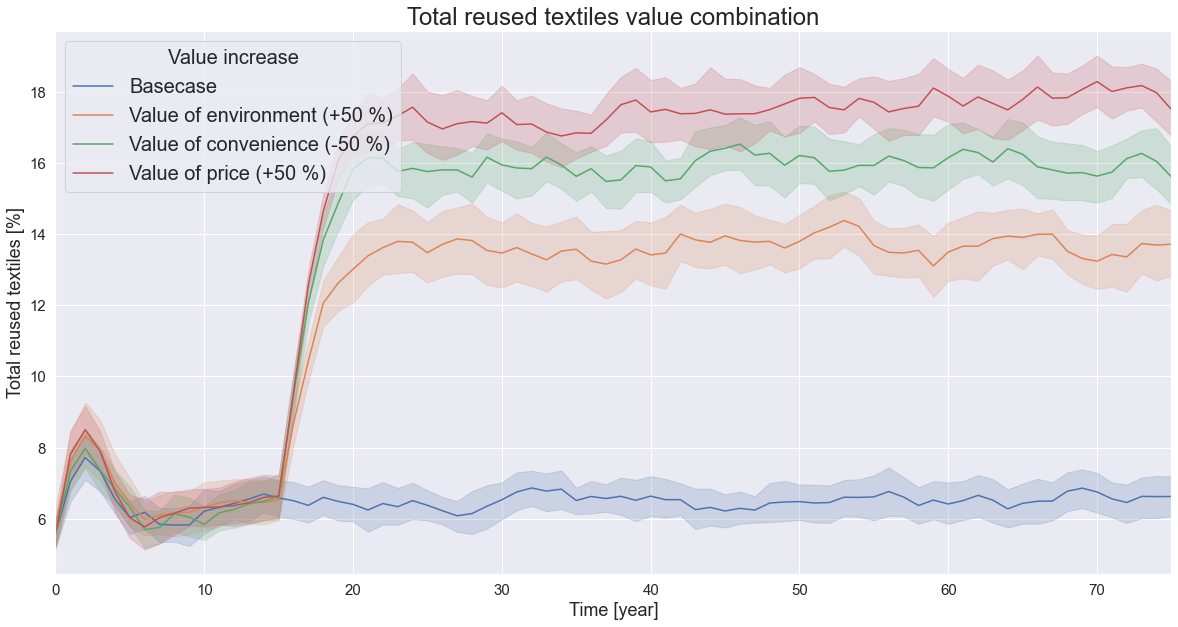

In [60]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_r, hue_order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"], hue = "Value-change", sort = True, ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(L_r, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title(T_r + "value combination", fontsize = 24)
plt.legend(title = "Value increase", labels =["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], title_fontsize = 20, fontsize=20)

In [61]:
Y_n = 'new-consumption'
T_n = "New textile consumption "
L_n = "New textile consumption [#/year]"

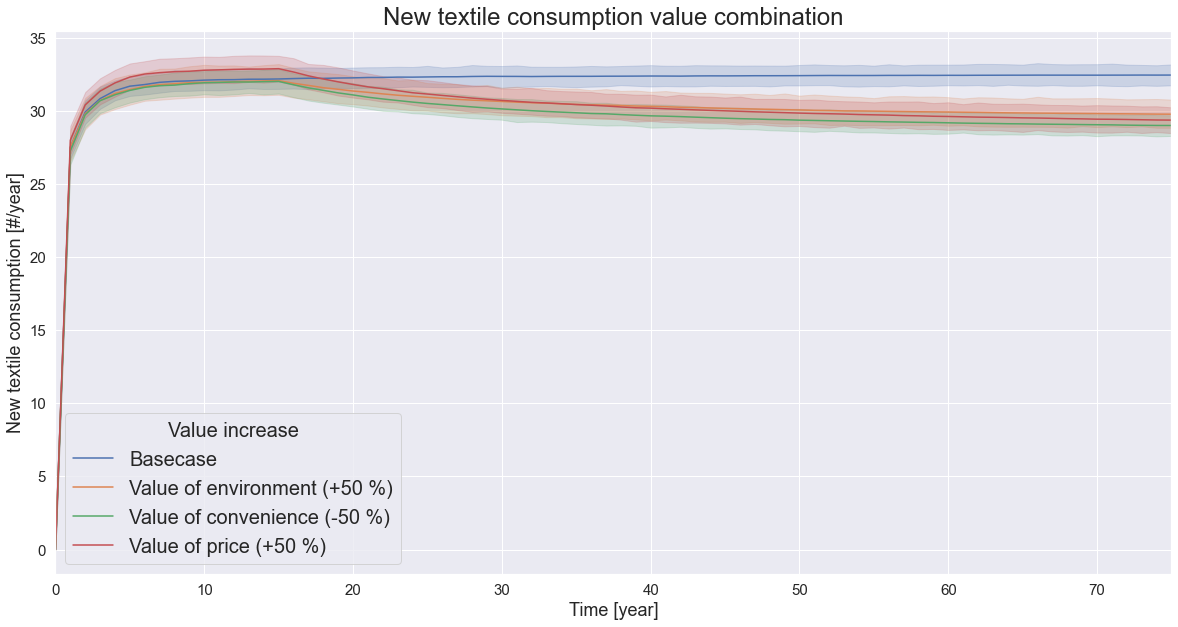

In [62]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_n, hue = "Value-change", hue_order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"], sort = True, ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(L_n, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title(T_n + "value combination", fontsize = 24)
plt.legend(title = "Value increase", labels =["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], title_fontsize = 20, fontsize=20)

In [63]:
Y_s = 'service-lifespan-1'
T_s = "Textile service lifespan "
L_s = "Textile service lifespan [years]"

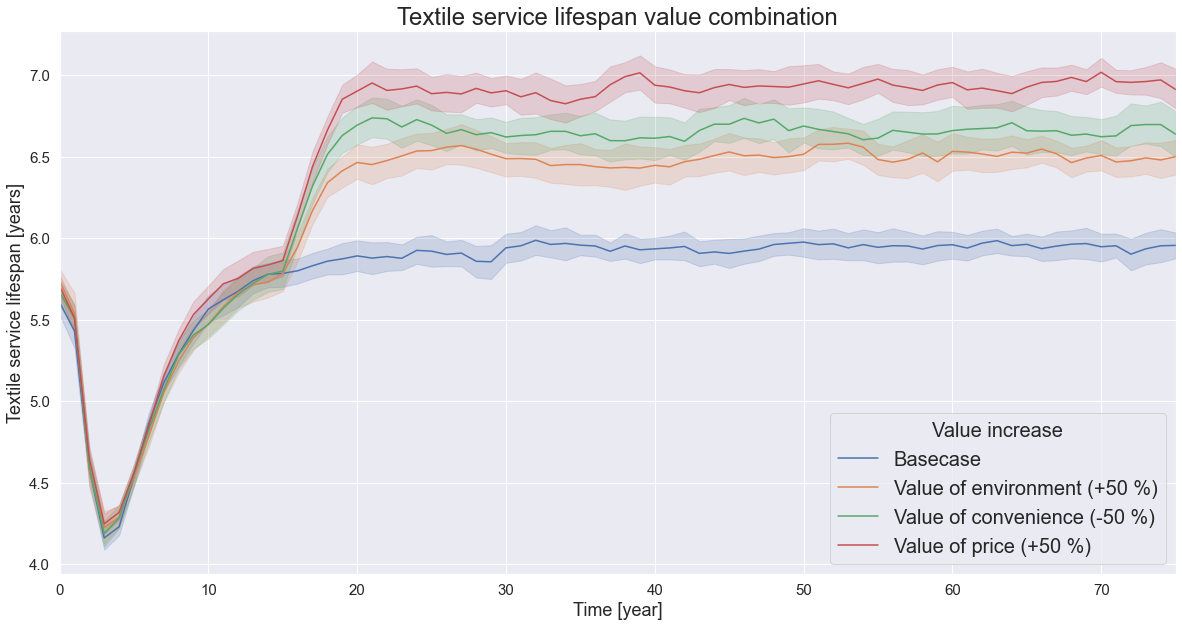

In [64]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_s, hue = "Value-change", hue_order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"], sort = True, ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(L_s, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title(T_s + "value combination", fontsize = 24)
plt.legend(title = "Value increase", labels =["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], title_fontsize = 20, fontsize=20)

In [65]:
Y_o = "owners"
T_o = "Number of owners "
L_o = "Number of owners"

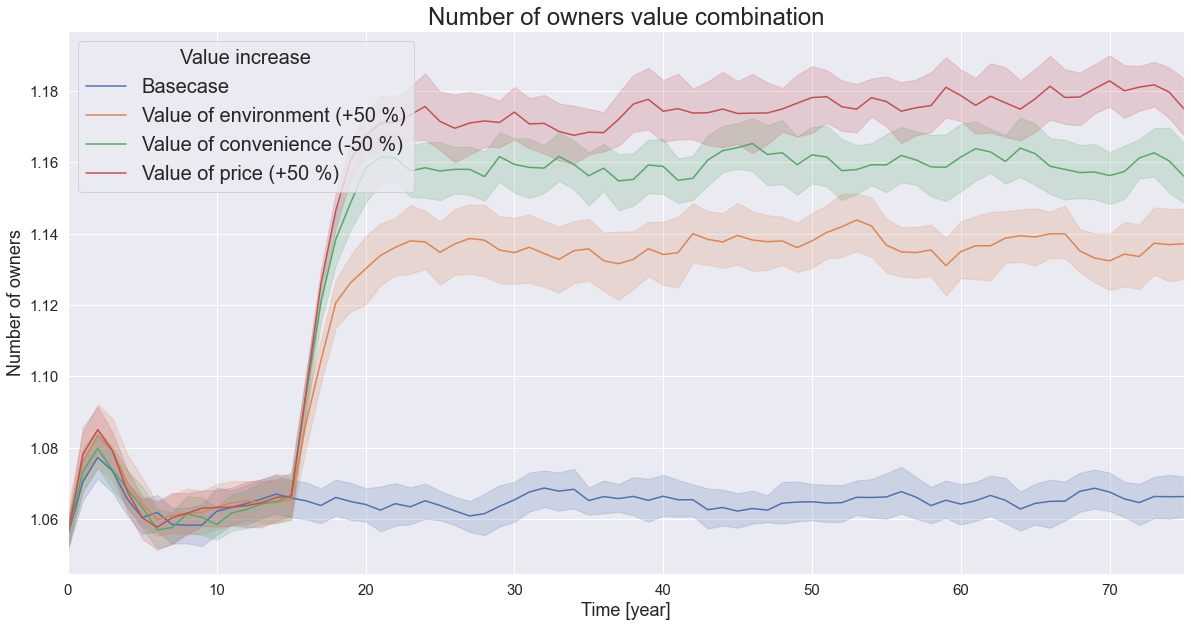

In [66]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_o, hue = "Value-change", hue_order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"], sort = True, ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(L_o, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title(T_o + "value combination", fontsize = 24)
plt.legend(title = "Value increase", labels =["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], title_fontsize = 20, fontsize=20)

# Figures not shortend

([<matplotlib.axis.XTick at 0x19a23e3d610>,
 [Text(0, 0, 'Basecase'),
  Text(1, 0, 'Value of environment (+50 %)'),
  Text(2, 0, 'Value of convenience (-50 %)'),
  Text(3, 0, 'Value of price (+50 %)')])

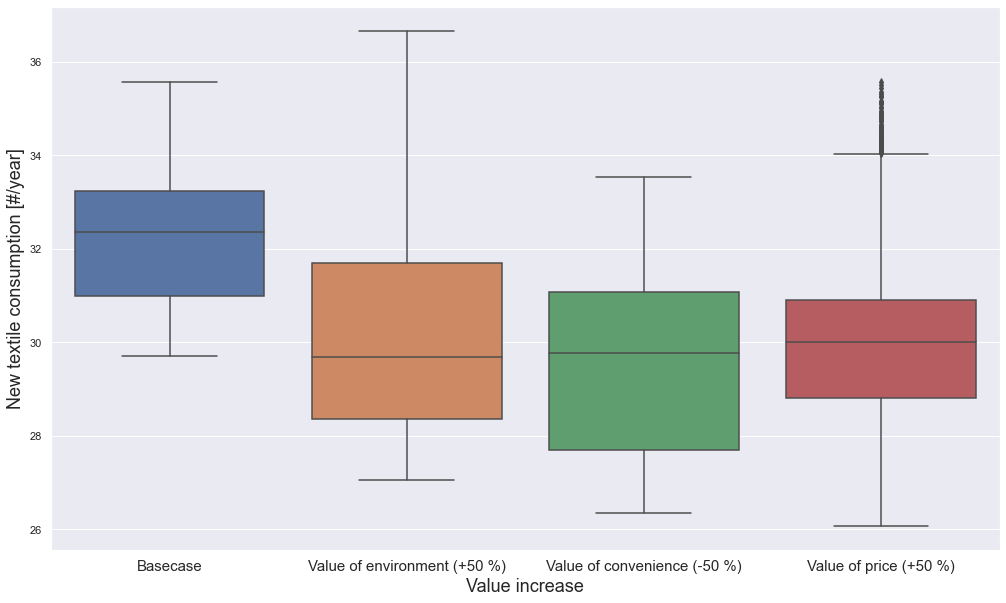

In [55]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='new-consumption', x = 'Value-change', order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"])
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('New textile consumption [#/year]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], fontsize=15)

([<matplotlib.axis.XTick at 0x19a26d92100>,
 [Text(0, 0, 'Basecase'),
  Text(1, 0, 'Value of environment (+50 %)'),
  Text(2, 0, 'Value of convenience (-50 %)'),
  Text(3, 0, 'Value of price (+50 %)')])

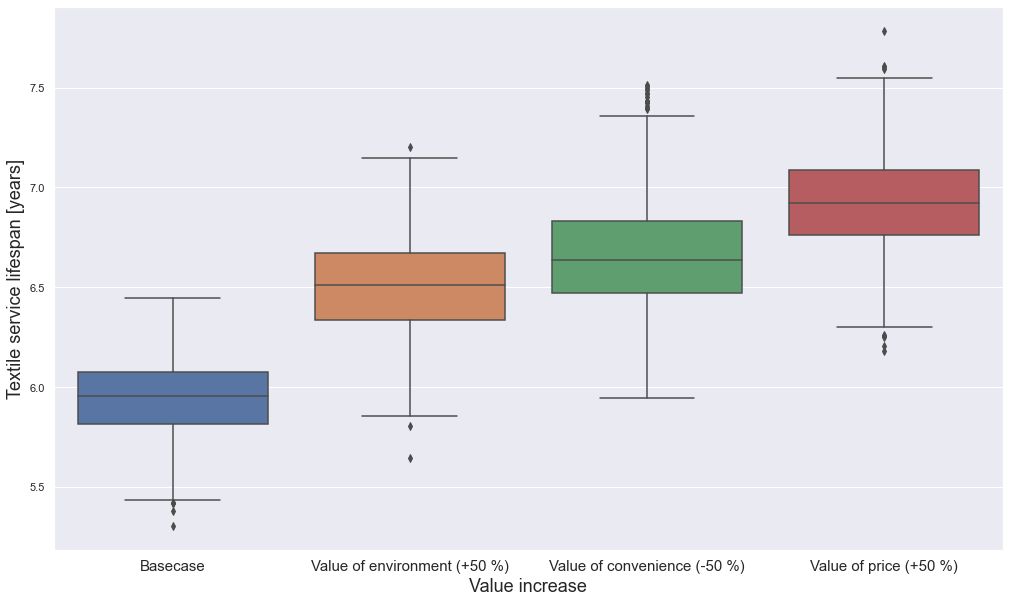

In [56]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='service-lifespan-1', x = 'Value-change', order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"])
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('Textile service lifespan [years]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], fontsize=15)

([<matplotlib.axis.XTick at 0x19a23df0460>,
 [Text(0, 0, 'Basecase'),
  Text(1, 0, 'Value of environment (+50 %)'),
  Text(2, 0, 'Value of convenience (-50 %)'),
  Text(3, 0, 'Value of price (+50 %)')])

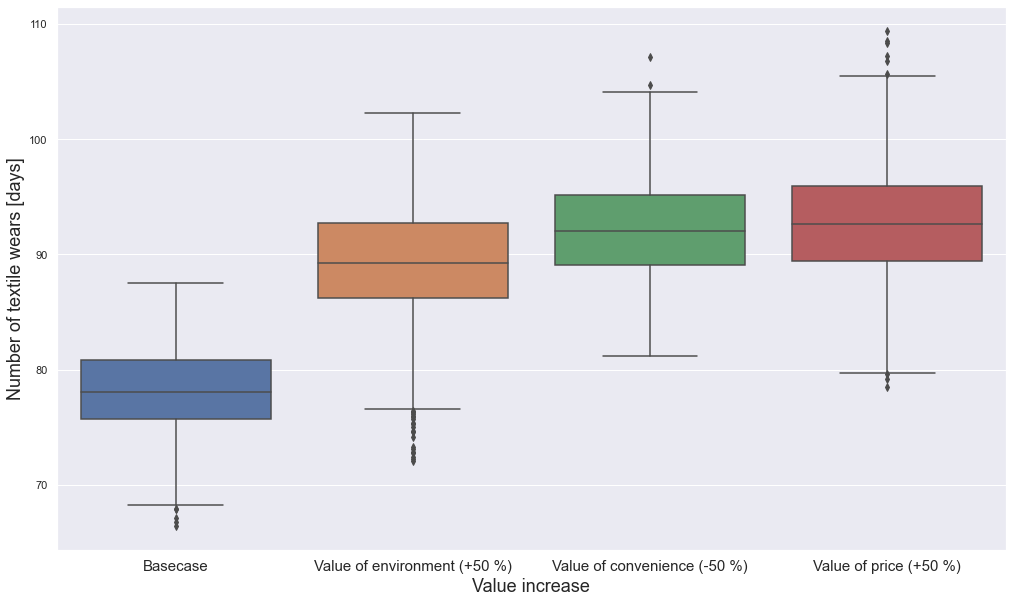

In [57]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='wears-1', x = 'Value-change', order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"])
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('Number of textile wears [days]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], fontsize=15)

([<matplotlib.axis.XTick at 0x19a29f2beb0>,
 [Text(0, 0, 'Basecase'),
  Text(1, 0, 'Value of environment (+50 %)'),
  Text(2, 0, 'Value of convenience (-50 %)'),
  Text(3, 0, 'Value of price (+50 %)')])

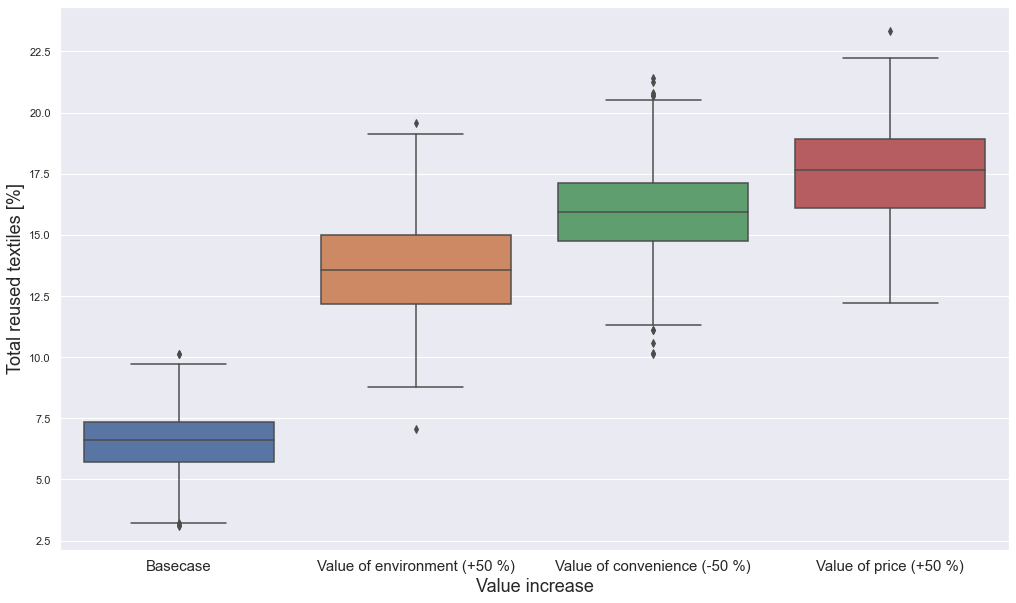

In [58]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='reused-textiles-percentage', x = 'Value-change', order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"])
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('Total reused textiles [%]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], fontsize=15)

([<matplotlib.axis.XTick at 0x19a008de4c0>,
 [Text(0, 0, 'Basecase'),
  Text(1, 0, 'Value of environment (+50 %)'),
  Text(2, 0, 'Value of convenience (-50 %)'),
  Text(3, 0, 'Value of price (+50 %)')])

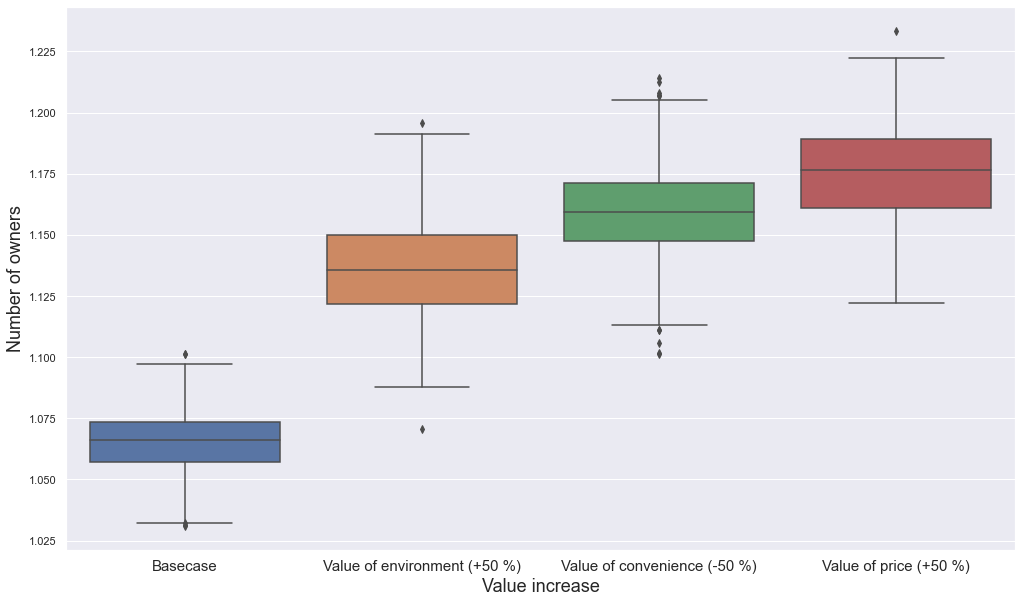

In [59]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='owners', x = 'Value-change', order = ["Basecase", "Value-of-environment-increase", "Value-of-convenience-increase", "Value-of-price-increase"])
plt.xlabel('Value increase', fontsize = 18)
plt.ylabel('Number of owners', fontsize=18)
plt.xticks(np.arange(4), labels = ["Basecase", "Value of environment (+50 %)", "Value of convenience (-50 %)",  "Value of price (+50 %)"], fontsize=15)